In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Univariate Selection**

In [2]:
df1 = pd.read_csv('bank_df.csv')
df1.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,age_scaled,balance_scaled,poutcome_failure,subscribed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.266667,1.249263,0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,-0.309735,0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.400000,-0.329646,0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.533333,0.779499,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.400000,-0.330383,0,0.0


In [3]:
df = pd.read_csv("bank_df.csv")
X = df.iloc[:,0:34]  #independent columns
X5 = df.iloc[:,:5]
X10 = df.iloc[:,:10]
X20 = df.iloc[:,:20]
X30 = df.iloc[:,:30]
y = df.iloc[:,-1]    #target column i.e price range

In [4]:
X

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45176,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45177,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(38,'Score'))  #print 10 best features

                  Specs        Score
33     poutcome_success  4102.364079
27            month_mar   751.390676
30            month_oct   736.544197
20      contact_unknown   730.603443
31            month_sep   678.905604
17          housing_yes   386.946356
28            month_may   328.216293
4           job_retired   264.230749
7           job_student   257.473070
22            month_dec   254.830097
0       job_blue-collar   182.752541
18             loan_yes   176.351728
14   education_tertiary   141.919597
12       marital_single   130.676994
11      marital_married    65.256115
23            month_feb    63.367162
32       poutcome_other    44.948695
25            month_jul    44.564087
3        job_management    39.195984
6          job_services    31.395433
13  education_secondary    29.669913
16          default_yes    22.190861
9        job_unemployed    18.455529
1      job_entrepreneur    16.680984
29            month_nov    12.301400
26            month_jun    10.996943
2

In [6]:
ordered_df = featureScores.nlargest(38,'Score')
df = df[list(ordered_df['Specs'].values)]
df.head()

,poutcome_success,month_mar,month_oct,contact_unknown,month_sep,housing_yes,month_may,job_retired,job_student,month_dec,...,month_nov,month_jun,job_housemaid,contact_telephone,education_unknown,month_jan,job_technician,month_aug,job_self-employed,job_unknown
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [8]:
X_train

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
43918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
39183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Create dataframes with different feature sets
X_train5 = X_train.iloc[:,:5]
X_train10 = X_train.iloc[:,:10]
X_train20 = X_train.iloc[:,:20]
X_train30 = X_train.iloc[:,:30]

**Top 5 Features Random Forest**

In [10]:
#Create and gridsearch a random forest model for the data.
rf5 = RandomForestClassifier()

parameters = {'n_estimators': [10], 
              'max_features': ['log2'], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [9], 
              'min_samples_split': [6],
              'min_samples_leaf': [2]
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(rf5, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train5, y_train)

rf5 = grid_obj.best_estimator_

rf5.fit(X_train5, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=6, n_estimators=10)

In [11]:
roc_auc_score(y, rf5.predict_proba(X5)[:, 1])

0.5806944110854424

**Top 10 Features Random Forest**

In [12]:
#Create and gridsearch a random forest model for the data.
rf10 = RandomForestClassifier()

parameters = {'n_estimators': [10], 
              'max_features': ['log2'], 
              'criterion': ['entropy'],
              'max_depth': [9], 
              'min_samples_split': [2,3,6],
              'min_samples_leaf': [3],
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(rf10, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train10, y_train)

rf10 = grid_obj.best_estimator_

rf10.fit(X_train10, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=3, n_estimators=10)

In [13]:
roc_auc_score(y, rf10.predict_proba(X10)[:, 1])

0.6040885207606467

**Top 20 Random Forest**

In [14]:
#Create and gridsearch a random forest model for the data.
rf20 = RandomForestClassifier()

parameters = {'n_estimators': [10], 
              'max_features': ['log2'], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [9], 
              'min_samples_split': [6],
              'min_samples_leaf': [3],
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(rf20, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train20, y_train)

rf20 = grid_obj.best_estimator_

rf20.fit(X_train20, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=10)

In [15]:
roc_auc_score(y, rf20.predict_proba(X20)[:, 1])

0.6810261509848266

**Top 30 Random Forest**

In [16]:
#Create and gridsearch a random forest model for the data.
rf30 = RandomForestClassifier()

parameters = {'n_estimators': [10], 
              'max_features': ['log2'], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [9], 
              'min_samples_split': [3],
              'min_samples_leaf': [2],
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(rf30, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train30, y_train)

rf30 = grid_obj.best_estimator_

rf30.fit(X_train30, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10)

In [17]:
roc_auc_score(y, rf30.predict_proba(X30)[:, 1])

0.7426418123113017

**All Features**

In [18]:
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [19]:
#Create and gridsearch a random forest model for the data.
rf_all = RandomForestClassifier()

parameters = {'n_estimators': [10], 
              'max_features': ['log2'], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [9], 
              'min_samples_split': [2,3,6],
              'min_samples_leaf': [1,2,3],
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(rf30, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train, y_train)

rf_all = grid_obj.best_estimator_

rf_all.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_split=6,
                       n_estimators=10)

In [20]:
roc_auc_score(y, rf_all.predict_proba(X)[:, 1])

0.770183177703319

**Logistic Regression**

In [21]:
#Create and gridsearch logistic regression model
lr = LogisticRegression()

parameters = {'C':[0.001,0.01,0.1,1,10,100]}

roc_auc = make_scorer(roc_auc_score, greater_is_better=True,
                                needs_threshold=True)
grid_obj_lr = GridSearchCV(lr, parameters, scoring=roc_auc)
grid_obj_lr = grid_obj_lr.fit(X_train, y_train)

lr = grid_obj_lr.best_estimator_

lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [22]:
roc_auc_score(y, lr.predict_proba(X)[:, 1])

0.7628435070508685

**KNN**

In [23]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors': [9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1]}

roc_auc = make_scorer(roc_auc_score, greater_is_better=True,
                                needs_threshold=True)
grid_obj_knn = GridSearchCV(knn, parameters, scoring=roc_auc)
grid_obj_lr = grid_obj_knn.fit(X_train, y_train)

knn = grid_obj_knn.best_estimator_

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [24]:
roc_auc_score(y, knn.predict_proba(X)[:, 1])

0.764593127142929

In [25]:
#Predict on model and get accuracy score
predictions_knn = knn.predict(X_test)
print(accuracy_score(y_test, predictions_knn))

0.8854212778515568


In [26]:
#Random forest confusion matrix
confusion_matrix(y_test, predictions_knn)

array([[11704,   229],
       [ 1324,   297]], dtype=int64)

**Thresholding for Profitibility**

In [27]:
knn.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

In [45]:
y_pred_proba = rf_all.predict_proba(X_test)[:,1]
y_pred_proba

array([0.09042032, 0.16187654, 0.08358641, ..., 0.11894368, 0.04932674,
       0.04644021])

In [47]:
y_pred = (rf_all.predict_proba(X_test)[:,1]).astype(bool)

In [48]:
def profitibility_threshold(y_test, y_pred_proba):
    threshold = []
    profit = []
    for j in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]:
        y_pred_temp = (y_pred_proba >= j).astype(bool)
        CM = confusion_matrix(y_test, y_pred_temp)
        TP = CM[1][1]
        revenue = TP*50
        cost = np.sum(5*y_pred)
        threshold.append(j)
        profit.append(revenue-cost)
    prof_dict = {'Threshold':threshold, 'Profit':profit}
    prof_df = pd.DataFrame(prof_dict)
    return prof_df

In [49]:
prof_df = profitibility_threshold(y_test, rf_all.predict_proba(X_test)[:,1])
prof_df

,Threshold,Profit
0,0.0,13280
1,0.1,-10770
2,0.2,-37070
3,0.3,-45420
4,0.4,-53370
5,0.5,-57170
6,0.6,-62620
7,0.7,-66970
8,0.8,-67720
9,0.9,-67770


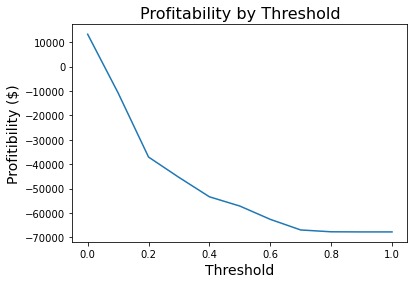

In [50]:
sns.lineplot(x='Threshold', y='Profit', data=prof_df)
plt.ylabel('Profitibility ($)', fontsize=14)
plt.xlabel('Threshold', fontsize=14)
plt.title('Profitability by Threshold', fontsize=16)
plt.show()